# Rain Prediction using Machine Learning algorithms

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [3]:
df = pd.read_csv('Weather Data.csv')
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,SSE,37,W,SSE,...,73,52,1025.9,1025.3,2,2,10.5,17.9,No,No
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30,W,ESE,...,78,53,1028.5,1024.6,2,2,11.0,18.7,No,No
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,W,24,WNW,N,...,85,56,1020.8,1015.0,6,6,10.2,17.3,No,No
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,W,43,W,W,...,56,35,1017.3,1015.1,5,2,12.4,19.0,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
std,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [6]:
df.isna().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [7]:
df.nunique()

Date             3271
MinTemp           204
MaxTemp           247
Rainfall          208
Evaporation        82
Sunshine          137
WindGustDir        16
WindGustSpeed      44
WindDir9am         16
WindDir3pm         16
WindSpeed9am       26
WindSpeed3pm       29
Humidity9am        80
Humidity3pm        86
Pressure9am       361
Pressure3pm       369
Cloud9am           10
Cloud3pm            9
Temp9am           229
Temp3pm           240
RainToday           2
RainTomorrow        2
dtype: int64

In [11]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2008-02-05,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


# Exploratory Data Analysis

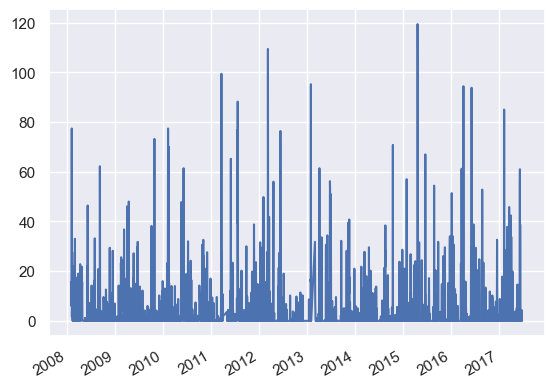

In [14]:
x = df['Date']
y = df['Rainfall']

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'W'),
  Text(1, 0, 'NNW'),
  Text(2, 0, 'WNW'),
  Text(3, 0, 'ENE'),
  Text(4, 0, 'NNE'),
  Text(5, 0, 'NW'),
  Text(6, 0, 'SSE'),
  Text(7, 0, 'NE'),
  Text(8, 0, 'ESE'),
  Text(9, 0, 'WSW'),
  Text(10, 0, 'SE'),
  Text(11, 0, 'SW'),
  Text(12, 0, 'N'),
  Text(13, 0, 'E'),
  Text(14, 0, 'SSW'),
  Text(15, 0, 'S')])

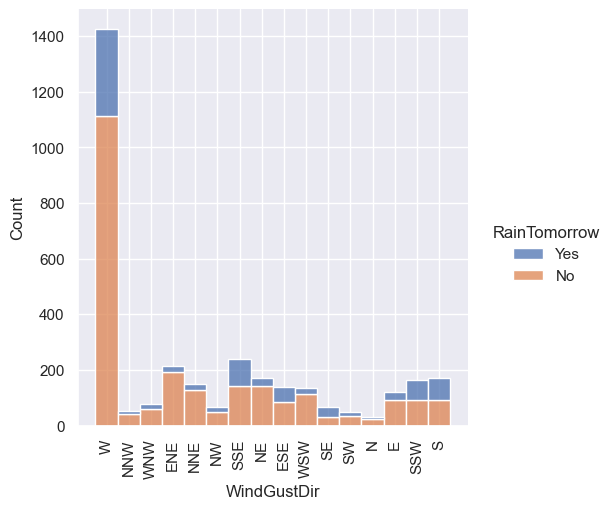

In [15]:
sns.displot(x='WindGustDir', hue='RainTomorrow', data=df, multiple='stack')
plt.xticks (rotation='vertical')

<Axes: xlabel='RainTomorrow', ylabel='Rainfall'>

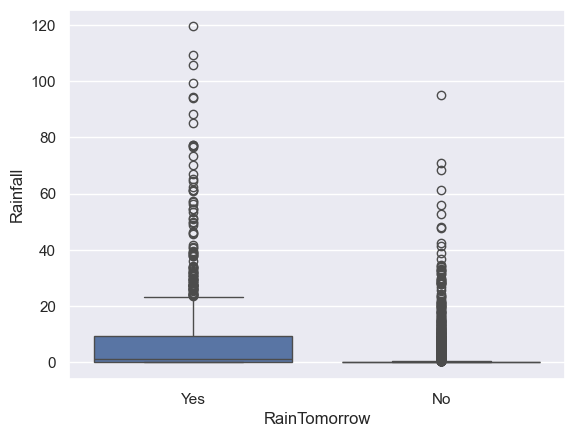

In [16]:
sns.boxplot(data=df, x='RainTomorrow', y='Rainfall')

<Axes: xlabel='RainTomorrow', ylabel='Sunshine'>

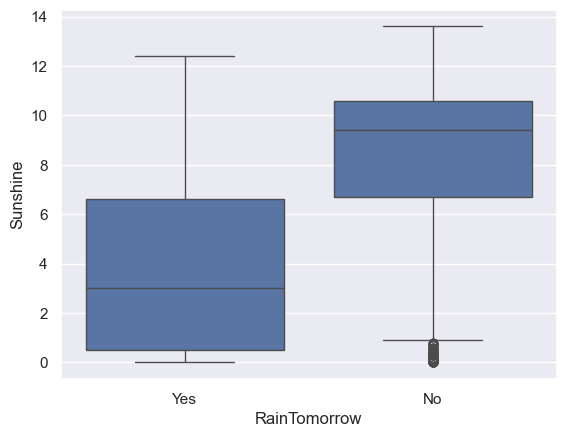

In [17]:
sns.boxplot(data=df, x="RainTomorrow", y="Sunshine")

<Axes: xlabel='RainTomorrow', ylabel='WindGustSpeed'>

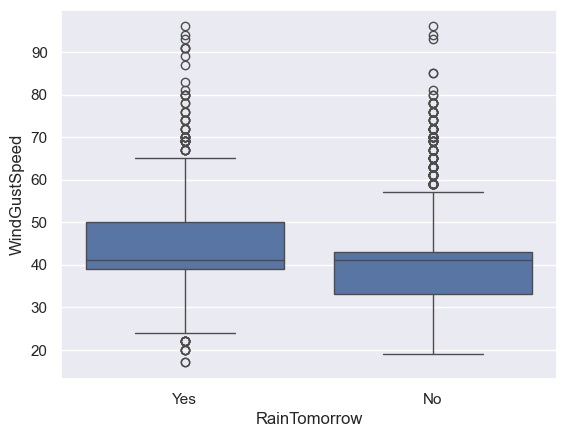

In [18]:
sns.boxplot(data=df, x="RainTomorrow", y="WindGustSpeed")

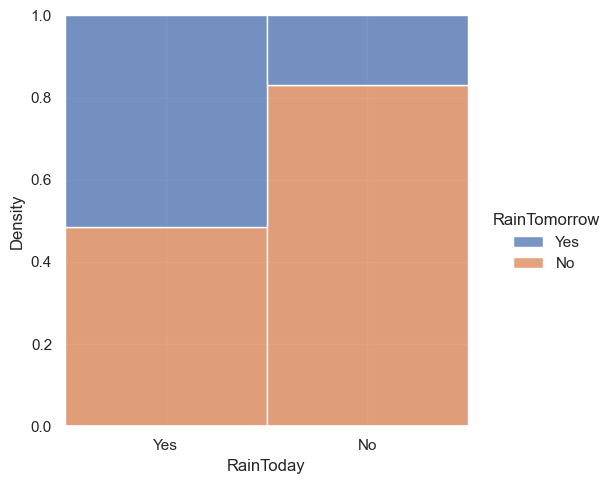

In [19]:
sns.displot(x='RainToday', hue='RainTomorrow', data=df, multiple='fill', stat='density')

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

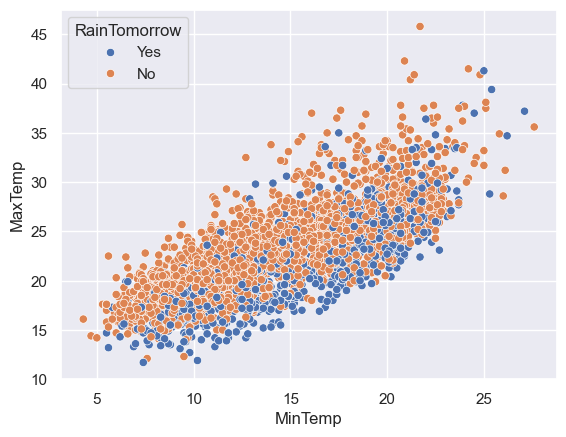

In [20]:
sns.scatterplot(data=df, x="MinTemp", y="MaxTemp", hue="RainTomorrow")

<Axes: xlabel='Rainfall', ylabel='Evaporation'>

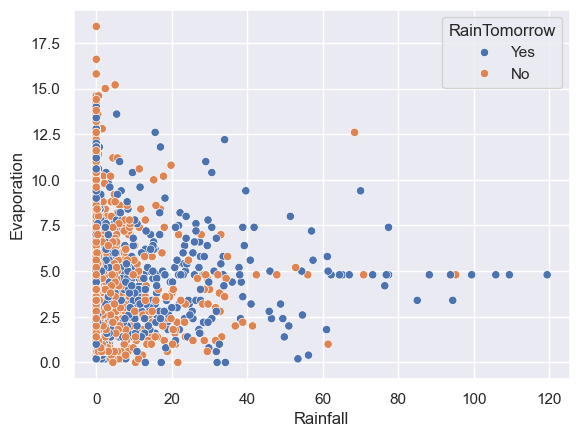

In [21]:
sns.scatterplot(data=df, x="Rainfall", y="Evaporation", hue="RainTomorrow")

# data preprocessing

In [22]:
df.dtypes

Date             datetime64[ns]
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed             int64
WindDir9am               object
WindDir3pm               object
WindSpeed9am              int64
WindSpeed3pm              int64
Humidity9am               int64
Humidity3pm               int64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                  int64
Cloud3pm                  int64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [23]:
df['WindGustDir'].unique()

array(['W', 'NNW', 'WNW', 'ENE', 'NNE', 'NW', 'SSE', 'NE', 'ESE', 'WSW',
       'SE', 'SW', 'N', 'E', 'SSW', 'S'], dtype=object)

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
print(df['WindGustDir'].unique(),
      df['WindDir9am'].unique(),
      df['WindDir3pm'] .unique(),
    df['RainToday'].unique(),
     df['RainTomorrow'].unique())

[13  6 14  1  5  7 10  4  2 15  9 12  3  0 11  8] [ 8 13  2  5 11 14  3 12  9 10 15  0  1  7  6  4] [11  0  2 13  1  8  9 10  4  5  6  7 14  3 15 12] [1 0] [1 0]


In [30]:
df.dtypes

Date             datetime64[ns]
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir               int64
WindGustSpeed             int64
WindDir9am                int64
WindDir3pm                int64
WindSpeed9am              int64
WindSpeed3pm              int64
Humidity9am               int64
Humidity3pm               int64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                  int64
Cloud3pm                  int64
Temp9am                 float64
Temp3pm                 float64
RainToday                 int64
RainTomorrow              int64
dtype: object

In [31]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,13,41,8,11,...,92,84,1017.6,1017.4,8,8,20.7,20.9,1,1
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,13,41,13,0,...,83,73,1017.9,1016.4,7,7,22.4,24.8,1,1
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,13,41,2,2,...,88,86,1016.7,1015.6,7,8,23.5,23.0,1,1
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,13,41,5,0,...,83,90,1014.2,1011.8,8,8,21.4,20.9,1,1
4,2008-02-05,19.7,25.7,77.4,4.8,0.0,13,41,5,13,...,88,74,1008.3,1004.8,8,8,22.5,25.5,1,1


# check the class value if its balance or not

RainTomorrow
0    2422
1     849
Name: count, dtype: int64

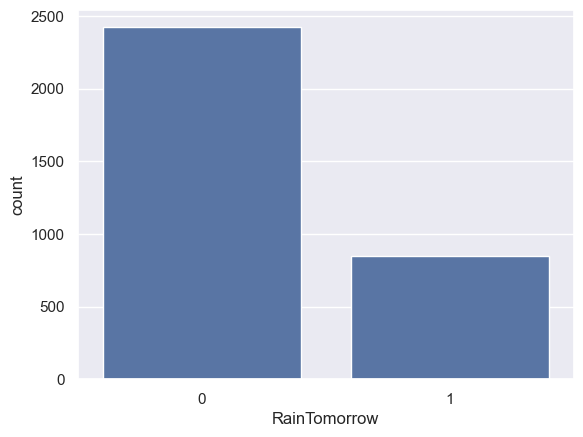

In [33]:
sns.countplot(x=df['RainTomorrow'])
df['RainTomorrow'].value_counts()

In [34]:
from sklearn.utils import resample

# create two different dataframe of majority and minority
df_majority = df[(df['RainTomorrow'] == 0)]
df_minority = df[(df['RainTomorrow'] == 1)]

# upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=2422, random_state=0)

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

RainTomorrow
1    2422
0    2422
Name: count, dtype: int64

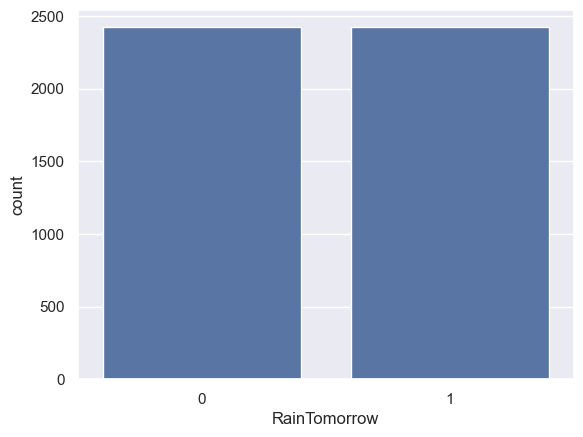

In [36]:
sns.countplot(x=df_upsampled['RainTomorrow'])
df_upsampled['RainTomorrow'].value_counts()

# remove the outlier using Z-Score

In [37]:
df_upsampled.drop(columns='Date',inplace=True)
df_upsampled.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2656,15.0,24.3,0.0,5.6,6.4,13,41,14,1,9,...,77,65,1022.7,1018.6,6,7,18.7,21.4,0,1
2166,14.3,20.7,2.4,1.0,7.5,5,31,14,1,15,...,86,61,1026.9,1022.8,5,4,15.2,20.0,1,1
2451,20.0,31.4,0.0,5.2,8.0,10,72,13,8,13,...,75,65,1010.5,1012.0,1,5,23.8,24.9,0,1
736,22.1,26.4,10.0,2.0,1.4,13,41,13,0,9,...,91,92,1007.3,1004.5,7,8,23.5,23.9,1,1
3217,14.9,18.4,1.4,5.0,3.4,8,43,8,10,17,...,61,67,1027.0,1027.3,6,8,16.9,16.3,1,1


In [38]:
#Remove Outlier using Z-Score Method
import scipy.stats as stats
z = np.abs(stats.zscore(df_upsampled))
data_clean = df_upsampled[(z<3).all(axis = 1)] 
data_clean.shape

(4556, 21)

# check the correlation

<Axes: >

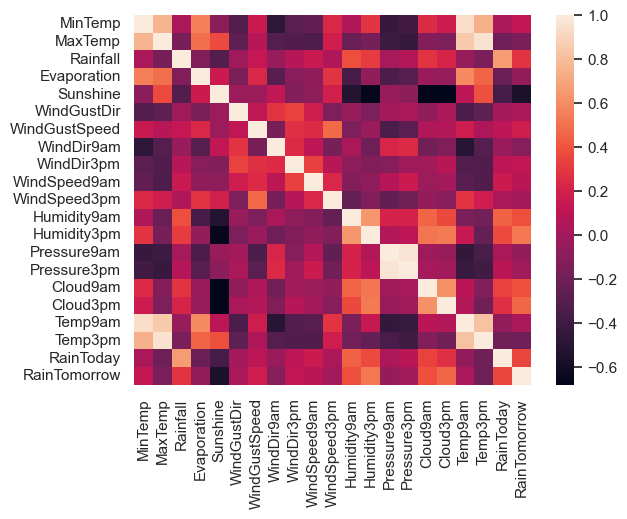

In [39]:
sns.heatmap(data_clean.corr(), fmt='.2g')

# Train and Test data

In [40]:
X = data_clean.drop('RainTomorrow', axis=1)
y = data_clean['RainTomorrow']

In [44]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred = lr.predict(X_test)

In [52]:
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Classification Report :\n", classification_report(y_test, y_pred))

Accuracy Score : 77.85 %
Confusion Matrix :
 [[356 104]
 [ 98 354]]
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.77      0.78       460
           1       0.77      0.78      0.78       452

    accuracy                           0.78       912
   macro avg       0.78      0.78      0.78       912
weighted avg       0.78      0.78      0.78       912



# K- Nearest Neighbor

In [53]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_pred = neigh.predict(X_test)

In [55]:
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Classification Report :\n", classification_report(y_test, y_pred))

Accuracy Score : 84.32 %
Confusion Matrix :
 [[356 104]
 [ 39 413]]
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.77      0.83       460
           1       0.80      0.91      0.85       452

    accuracy                           0.84       912
   macro avg       0.85      0.84      0.84       912
weighted avg       0.85      0.84      0.84       912



# Support Vector Machine

In [56]:
from sklearn import svm
support = svm.SVC()
support.fit(X_train, y_train)

SVC()

In [57]:
y_pred = support.predict(X_test)

In [58]:
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Classification Report :\n", classification_report(y_test, y_pred))

Accuracy Score : 74.12 %
Confusion Matrix :
 [[360 100]
 [136 316]]
Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.78      0.75       460
           1       0.76      0.70      0.73       452

    accuracy                           0.74       912
   macro avg       0.74      0.74      0.74       912
weighted avg       0.74      0.74      0.74       912



# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [60]:
y_pred = dtree.predict(X_test)

In [61]:
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Classification Report :\n", classification_report(y_test, y_pred))

Accuracy Score : 89.04 %
Confusion Matrix :
 [[387  73]
 [ 27 425]]
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.84      0.89       460
           1       0.85      0.94      0.89       452

    accuracy                           0.89       912
   macro avg       0.89      0.89      0.89       912
weighted avg       0.89      0.89      0.89       912



Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8903508771929824')

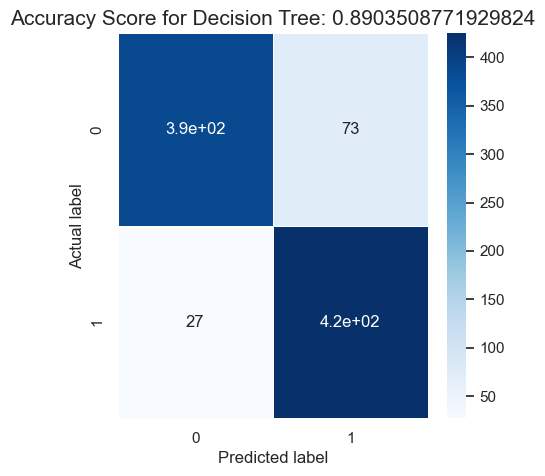

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

# Feature importance for Decision Tree

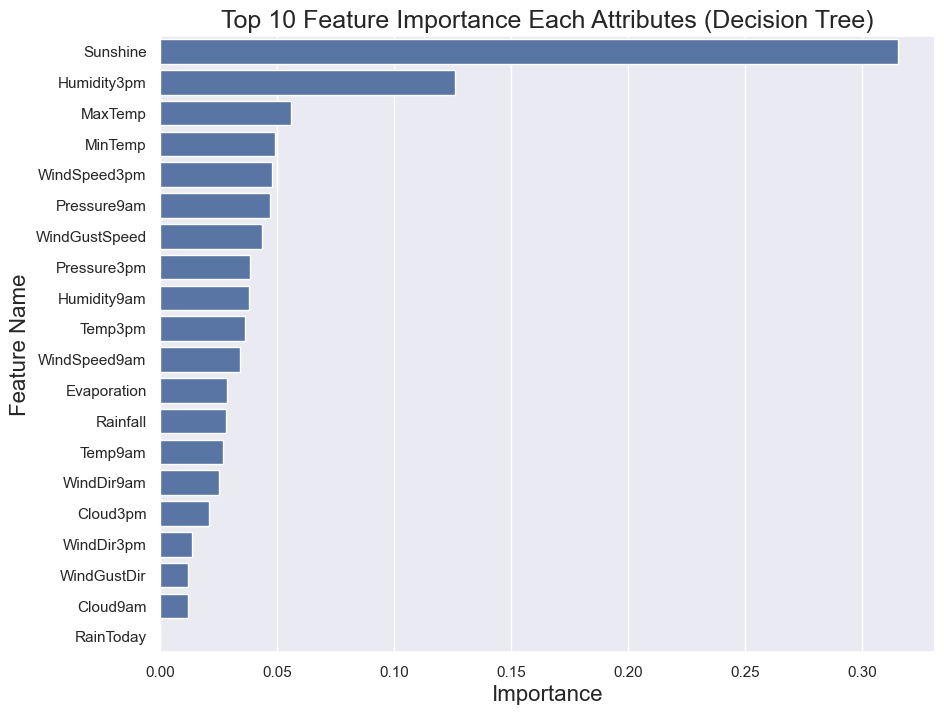

In [64]:
imp_df = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Importance': dtree.feature_importances_
})
fi = imp_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# Roc and AUC curve

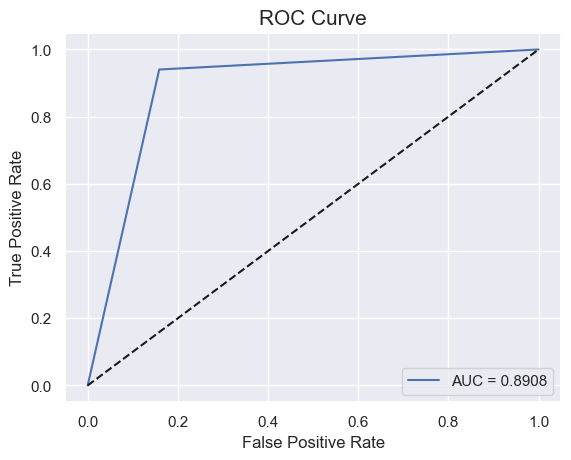

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# conclusion

## high accuracy 89% and AUC 0.8908 in Decision Tree Model